# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64
0.5909090909090909
Baseline Accuracy with all features: 0.5909
Accuracy for feature N is: 0.1491
Importance drop for feature N is: 0.4418
Accuracy for feature P is: 0.2145
Importance drop for feature P is: 0.3764
Accuracy for feature K is: 0.3236
Importance drop for feature K is: 0.2673
Accuracy for feature ph is: 0.0909
Importance drop for feature ph is: 0.5000


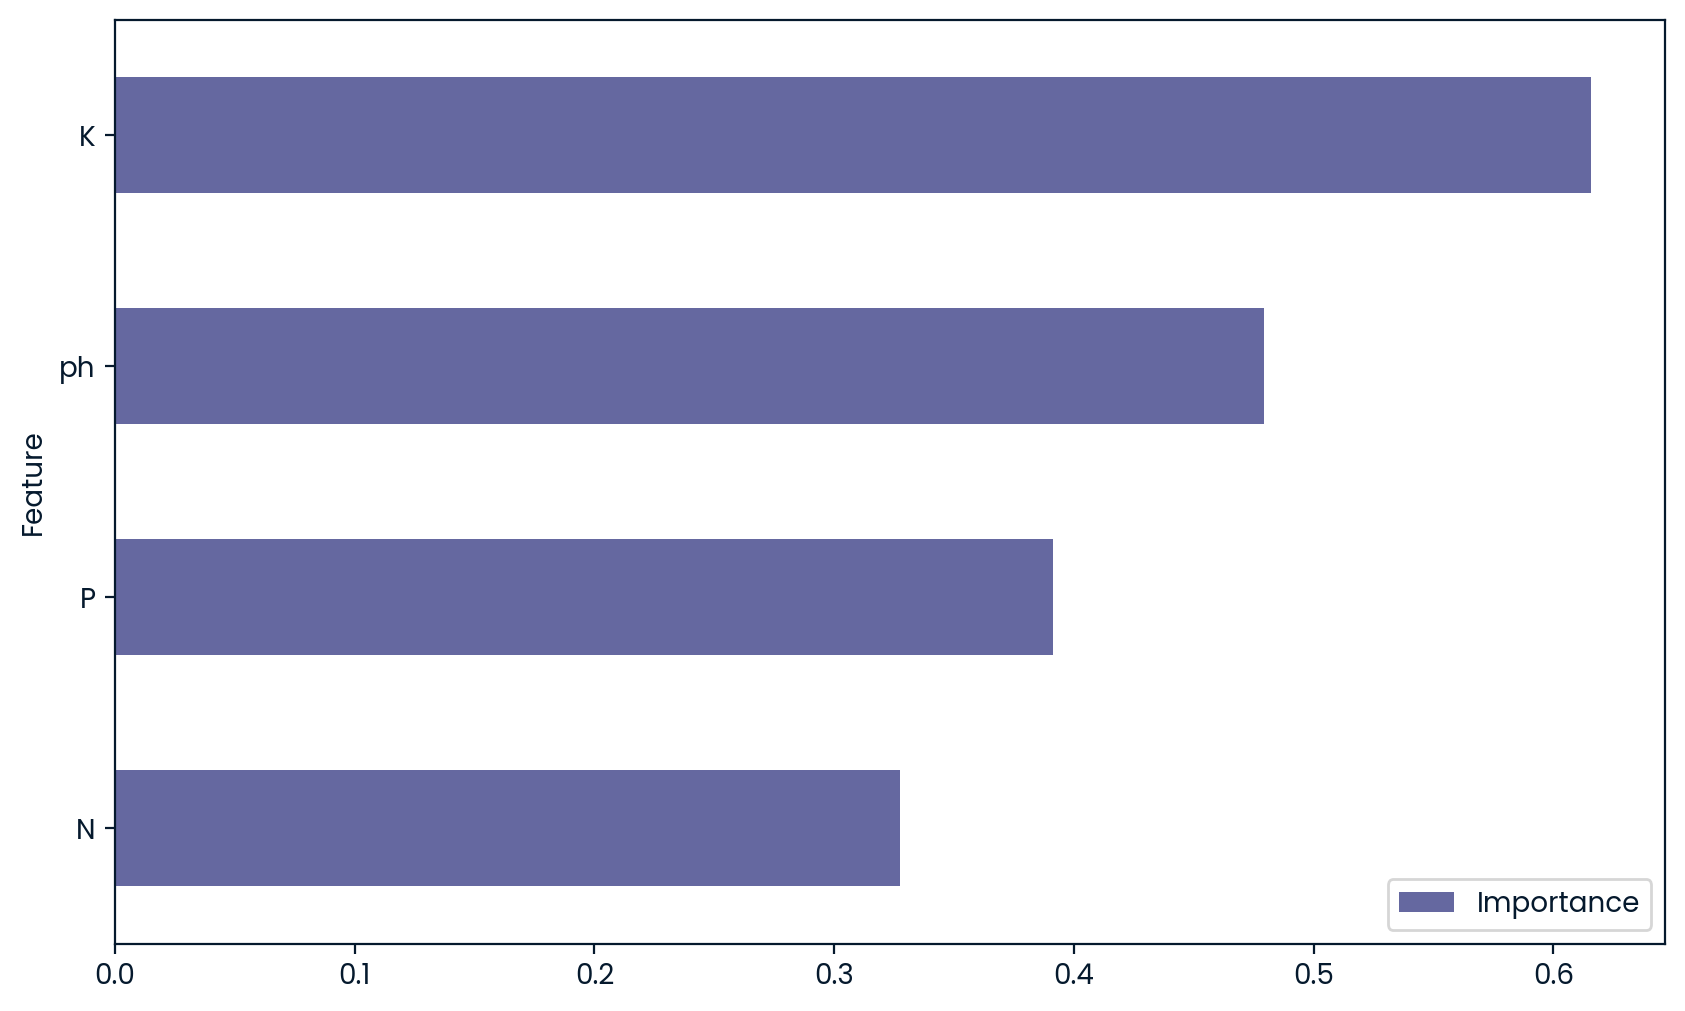

In [27]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
print(crops.head())

print(crops['crop'].value_counts())

le = LabelEncoder()
crops['crop_le'] = le.fit_transform(crops['crop'])

X = crops[['N','P','K','ph']]
y = crops['crop_le']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

def feature_importance_crops(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    
    # Fit a model on all features to get a baseline accuracy
    model_all_features = LogisticRegression(random_state=42)
    model_all_features.fit(X_train, y_train)
    y_pred_all = model_all_features.predict(X_test)
    baseline_accuracy = metrics.accuracy_score(y_test, y_pred_all)
    
    print(f'Baseline Accuracy with all features: {baseline_accuracy:.4f}')
    for col in X.columns:
        X_train_single = X_train[[col]]
        X_test_single = X_test[[col]]
        
        model_single_feature = LogisticRegression(random_state=42)
        model_single_feature.fit(X_train_single, y_train)
        y_pred_single = model_single_feature.predict(X_test_single)
        
        accuracy = metrics.accuracy_score(y_test, y_pred_single)
        print(f'Accuracy for feature {col} is: {accuracy:.4f}')
        
        # The importance could be inferred from the drop in accuracy compared to the baseline
        importance_drop = baseline_accuracy - accuracy
        print(f'Importance drop for feature {col} is: {importance_drop:.4f}')   
    
feature_importance_crops(X, y)

best_predictive_feature = {'K': 0.3236}